# **Задача классификации**



In [ ]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Оценка стоимости бриллиантов
Предположим что вы хотите купить/продать бриллианты, и желаете узнать за какую цену их купить/продать тот или иной бриллиант соответсвующего качества огранки. Загрузим данные о бриллиантах.

# 1. Загружаем данные



In [ ]:
url = 'https://raw.githubusercontent.com/EvgenyRaevsky/machine-learning/main/Diamonds-Prices2022.csv'
data_raw = pd.read_csv(url)

In [ ]:
type(data_raw)

pandas.core.frame.DataFrame

Данная таблица содержит данные почти о 54 тысячах бриллиантах круглой огранки. Каждый бриллиант имеет 10 характеристик - карат, огранка, цвет, чистота, глубина (%), стол (%), цена ($), x (длина), y (ширина), z (высота). 

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному бриллианту) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [ ]:
data_raw.shape

(53943, 10)

In [ ]:
data_raw


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [ ]:
data_raw.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data_raw.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


Можно увидеть, что столбцы (признаки) имеют следующие названия:
*   **carat** - карат, т.е. вес бриллианта (1 карат = 0.2 грамма).
*   **cut** - огранка (" *Fair* " - прекрасный, " *Good* " - хороший, " *Ideal* " - идеальный,   " *Premium* " - премиум, " *Very Good* " - очень хороший).
*   **color** - цвет (" *D* ", " *E* " - голубовато - белые; " *F* ", " *G* " - немного голубоватые, водяно - прозрачные, белые; " *H* " - серовато - белые, желтовато - белые; " *I* " - белые с едва уловимыми цветными оттенками; " *J* " - белые со слабыми цветными оттенками).
*   **clarity** - чистота (" *I1* " - заметные включения; " *IF* " - чистый, без внутренних и внешних деффектов; " *SI1* ", " *SI2* " - мелкие заметные включения; " *VS1* ", " *VS2* " - очень мелкие включения; " *VVS1* ", " *VVS2* " - очень - очень мелкие включения). Чем больше цифра категории, тем хуже качество минерала.
*   **depth** - глубина (%) относится к его измерению сверху вниз, от стола на верхней части бриллианта до отверстия в его основании.
*   **table** - стол (%) т.е. плоская грань на его поверхности (большая плоская грань, которую можно увидеть, если смотреть на бриллиант сверху).
*   **price** - цена ($).
*   **x** - длина бриллианта
*   **y** - щирина бриллианта
*   **z** - высота бриллианта

Задача прогнозирования состоит в том, чтобы определить соответствуют ли цена и остальные характеристики качеству огранки бриллиантов.









In [ ]:
data_raw.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53935.000000,53936.000000,53929.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.732008,5.735271,3.539648
std,0.473999,1.432626,2.234549,3989.338447,1.119639,1.140307,0.703464
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Теперь вычислим есть ли в каждой колонке таблицы пропущенные значения

In [ ]:
data_raw.isna().sum()  

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          14
dtype: int64

Отсюда видно, что в признаке " *x* " - 8 пропущенных значений, в " *y* " - 7 пропущенных значений, а в " *z* " - 14 пропущенных значений. В данной задаче их можно было бы построчно удалить, потому что данных достаточно много а пропущенных значений крайне мало, но воспользуемя другим способом и заполним пропущенные значения медианами (т.к. данные признаки имеют числовые значения)

In [ ]:
feat = ['x', 'y', 'z']
data_raw[feat].median(axis = 0)

x    5.70
y    5.71
z    3.53
dtype: float64

In [ ]:
data_raw[feat] = data_raw[feat].fillna(data_raw[feat].median(axis = 0), axis=0)

In [ ]:
data_raw.isna().sum()  

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data_raw['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      402.00
0.010      429.00
0.050      544.00
0.100      646.00
0.500     2401.00
0.900     9821.00
0.950    13106.70
0.990    17378.16
0.995    18093.48
Name: price, dtype: float64

In [ ]:
data_raw['carat'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.23
0.010    0.24
0.050    0.30
0.100    0.31
0.500    0.70
0.900    1.51
0.950    1.70
0.990    2.18
0.995    2.31
Name: carat, dtype: float64

Мы видим, например, что  99%  всех значений признака " *price* " находится в диапазоне от  402.00  до  18093.48  долларов (это значения квантилей, соответствующих уровням  0.005  и  0.995  соответственно). Для признака " *carat* " 99% всех значений находится в диапазоне от  0.23  до  2.31  карат.

Удалим все строки таблицы, в которых " *price* " или " *carat* " выходят за пределы квантилей  0.005 ,  0.995 .

In [ ]:
rows_to_drop = data_raw[
    (data_raw['price'] < data_raw['price'].quantile(0.005)) | (data_raw['price'] > data_raw['price'].quantile(0.995)) | 
    (data_raw['carat']  < data_raw['carat' ].quantile(0.005)) | (data_raw['carat']  > data_raw['carat' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(53187, 10)

In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,53187.00000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000
mean,0.78650,61.748367,57.451452,3830.087897,5.714697,5.718128,3.529130
std,0.45107,1.427695,2.231648,3802.283936,1.090066,1.112493,0.685355
min,0.23000,43.000000,43.000000,402.000000,3.830000,3.840000,0.000000
25%,0.40000,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.70000,61.800000,57.000000,2391.000000,5.690000,5.700000,3.520000
75%,1.04000,62.500000,59.000000,5241.000000,6.530000,6.520000,4.030000
max,2.31000,79.000000,95.000000,18077.000000,8.800000,58.900000,31.800000


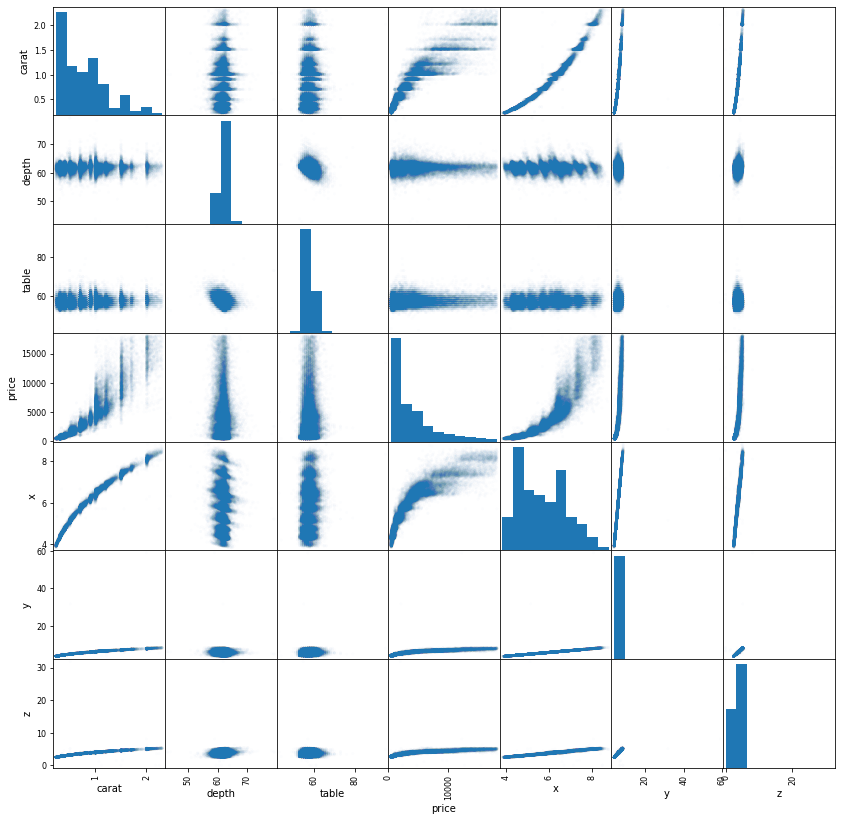

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (14, 14))
pass

Теперь вычислим матрицу корреляции для количественных признаков:

In [ ]:
corr_mat = data.corr()
corr_mat

,carat,depth,table,price,x,y,z
carat,1.000000,0.025718,0.186132,0.921690,0.980347,0.955147,0.960131
depth,0.025718,1.000000,-0.294606,-0.011189,-0.027380,-0.031324,0.095056
table,0.186132,-0.294606,1.000000,0.128890,0.199233,0.187006,0.154059
price,0.921690,-0.011189,0.128890,1.000000,0.885374,0.864787,0.863908
x,0.980347,-0.027380,0.199233,0.885374,1.000000,0.973289,0.972109
y,0.955147,-0.031324,0.187006,0.864787,0.973289,1.000000,0.952331
z,0.960131,0.095056,0.154059,0.863908,0.972109,0.952331,1.000000


Для удобства используем визуальный образ этой матрицы. Чем светлее ячейка матрицы, тем больше по абсолютной величине коэффициент корреляции:

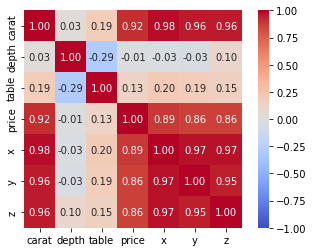

In [ ]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

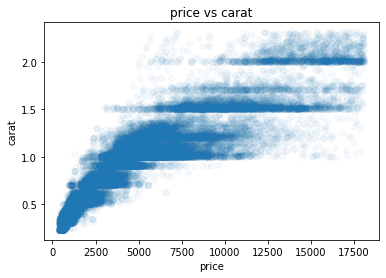

In [ ]:
plt.plot(data['price'], data['carat'], 'o', alpha = 0.035)
plt.xlabel('price')
plt.ylabel('carat')
plt.title('price vs carat')
pass

In [ ]:
data['cut'] == 'Premium'

30       False
31       False
32       False
33       False
34       False
         ...  
53938     True
53939    False
53940     True
53941     True
53942    False
Name: cut, Length: 53187, dtype: bool

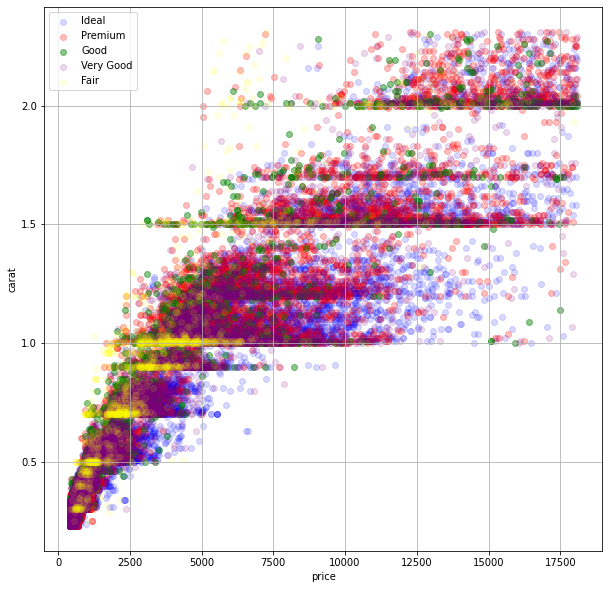

In [ ]:
plt.figure(figsize = (10, 10))

plt.scatter(data[data['cut'] == 'Ideal']['price'],
            data[data['cut'] == 'Ideal']['carat'],
            alpha = 0.15,
            label = 'Ideal',
            color = 'blue')

plt.scatter(data[data['cut'] == 'Premium']['price'],
            data[data['cut'] == 'Premium']['carat'],
            alpha = 0.25,
            label = 'Premium',
            color = 'red')

plt.scatter(data[data['cut'] == 'Good']['price'],
            data[data['cut'] == 'Good']['carat'],
            alpha = 0.45,
            label = 'Good',
            color = 'green')

plt.scatter(data[data['cut'] == 'Very Good']['price'],
            data[data['cut'] == 'Very Good']['carat'],
            alpha = 0.15,
            label = 'Very Good',
            color = 'purple')

plt.scatter(data[data['cut'] == 'Fair']['price'],
            data[data['cut'] == 'Fair']['carat'],
            alpha = 0.1,
            label = 'Fair',
            color = 'yellow')

plt.xlabel('price')
plt.ylabel('carat')
plt.legend()
plt.grid()

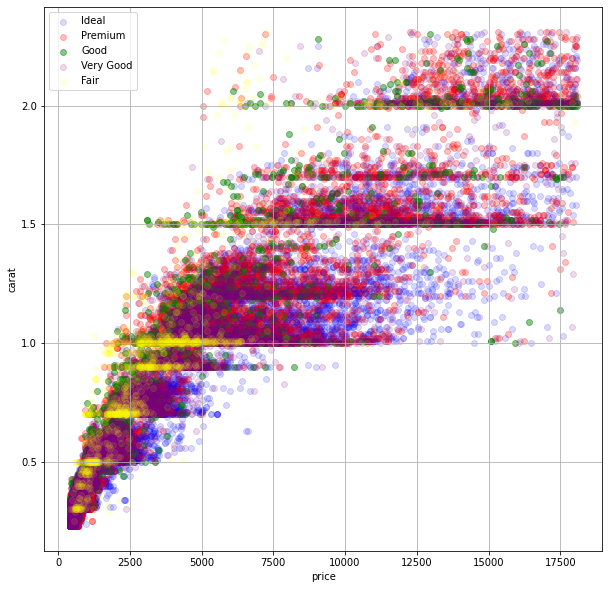

In [ ]:
np.random.seed(0)
price_rnd = data['price'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 10))

plt.scatter(price_rnd[data['cut'] == 'Ideal'],
            data[data['cut'] == 'Ideal']['carat'],
            alpha = 0.15,
            label = 'Ideal',
            color = 'blue')

plt.scatter(price_rnd[data['cut'] == 'Premium'],
            data[data['cut'] == 'Premium']['carat'],
            alpha = 0.25,
            label = 'Premium',
            color = 'red')

plt.scatter(price_rnd[data['cut'] == 'Good'],
            data[data['cut'] == 'Good']['carat'],
            alpha = 0.45,
            label = 'Good',
            color = 'green')

plt.scatter(price_rnd[data['cut'] == 'Very Good'],
            data[data['cut'] == 'Very Good']['carat'],
            alpha = 0.15,
            label = 'Very Good',
            color = 'purple')

plt.scatter(price_rnd[data['cut'] == 'Fair'],
            data[data['cut'] == 'Fair']['carat'],
            alpha = 0.1,
            label = 'Fair',
            color = 'yellow')


plt.xlabel('price')
plt.ylabel('carat')
plt.legend()
plt.grid()

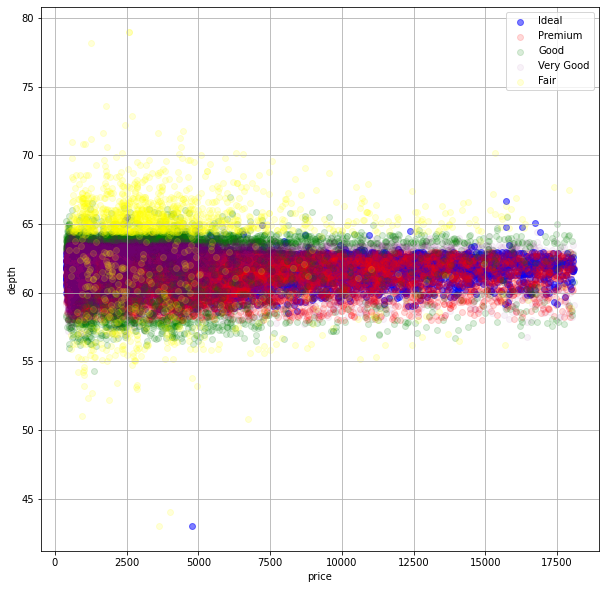

In [ ]:
plt.figure(figsize = (10, 10))

plt.scatter(data[data['cut'] == 'Ideal']['price'],
            data[data['cut'] == 'Ideal']['depth'],
            alpha = 0.5,
            label = 'Ideal',
            color = 'blue')

plt.scatter(data[data['cut'] == 'Premium']['price'],
            data[data['cut'] == 'Premium']['depth'],
            alpha = 0.15,
            label = 'Premium',
            color = 'red')

plt.scatter(data[data['cut'] == 'Good']['price'],
            data[data['cut'] == 'Good']['depth'],
            alpha = 0.15,
            label = 'Good',
            color = 'green')

plt.scatter(data[data['cut'] == 'Very Good']['price'],
            data[data['cut'] == 'Very Good']['depth'],
            alpha = 0.05,
            label = 'Very Good',
            color = 'purple')

plt.scatter(data[data['cut'] == 'Fair']['price'],
            data[data['cut'] == 'Fair']['depth'],
            alpha = 0.15,
            label = 'Fair',
            color = 'yellow')

plt.xlabel('price')
plt.ylabel('depth')
plt.legend()
plt.grid()

In [ ]:
data.describe(include = 'all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53187.00000,53187,53187,53187,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21336,11177,12895,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.78650,NaN,NaN,NaN,61.748367,57.451452,3830.087897,5.714697,5.718128,3.529130
std,0.45107,NaN,NaN,NaN,1.427695,2.231648,3802.283936,1.090066,1.112493,0.685355
min,0.23000,NaN,NaN,NaN,43.000000,43.000000,402.000000,3.830000,3.840000,0.000000
25%,0.40000,NaN,NaN,NaN,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.70000,NaN,NaN,NaN,61.800000,57.000000,2391.000000,5.690000,5.700000,3.520000
75%,1.04000,NaN,NaN,NaN,62.500000,59.000000,5241.000000,6.530000,6.520000,4.030000


# 2. Бинаризация номинальных признаков

In [ ]:
data['cut'].unique()

array(['Very Good', 'Good', 'Ideal', 'Premium', 'Fair'], dtype=object)

In [ ]:
data['color'].unique()

array(['F', 'E', 'D', 'H', 'I', 'J', 'G'], dtype=object)

In [ ]:
data['clarity'].unique()

array(['VS1', 'SI1', 'VS2', 'SI2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
for name in data['cut'].unique():
    print(name, data['carat'][data['cut'] == name].iloc[0])

Very Good 0.23
Good 0.23
Ideal 0.33
Premium 0.29
Fair 0.86


In [ ]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['cut', 'color', 'clarity']
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [ ]:
for c in categorical_columns:
    print(c, data[c].unique())

cut ['Very Good' 'Good' 'Ideal' 'Premium' 'Fair']
color ['F' 'E' 'D' 'H' 'I' 'J' 'G']
clarity ['VS1' 'SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'IF']


In [ ]:
data.describe(include = [object])

,cut,color,clarity
count,53187,53187,53187
unique,5,7,8
top,Ideal,G,SI1
freq,21336,11177,12895


In [ ]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [ ]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['cut', 'color', 'clarity']


Как видно бинарных признаков нет. К небинарными признакам применим метод векторизации, который заключается в следующем.

Признак j, принимающий s значений, заменим на s признаков, принимащих значения 0 или 1, в зависимости от того, чему равно значение исходного признака j.

Например, в нашей задаче признак cut принимает 5 различных значений:

In [ ]:
data['color'].unique()

array(['F', 'E', 'D', 'H', 'I', 'J', 'G'], dtype=object)

Заменим признак color 7 признаками: F, E, ..., G.

Если признак color принимает значение F, то признак F равен 1, а все остальные равны 0.
Если признак color принимает значение E, то признак E равен 1, а все остальные равны 0.
и т.д.

In [ ]:
color_dummies = pd.get_dummies(data['color'])

In [ ]:
color_dummies.head()

,D,E,F,G,H,I,J
30,0,0,1,0,0,0,0
31,0,0,1,0,0,0,0
32,0,1,0,0,0,0,0
33,0,1,0,0,0,0,0
34,1,0,0,0,0,0,0


In [ ]:
clarity_dummies = pd.get_dummies(data['clarity'])

In [ ]:
clarity_dummies.head()

,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
30,0,0,0,0,1,0,0,0
31,0,0,0,0,1,0,0,0
32,0,0,0,0,1,0,0,0
33,0,0,0,0,1,0,0,0
34,0,0,0,0,1,0,0,0


In [ ]:
cut = data['cut']

Так как многие алгоритмы машинного обучения чувствительны к масштабированию данных, например, метод ближайших соседей, машина опорных векторов и др., то в этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [ ]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,carat,depth,table,price,x,y,z
count,53187.00000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000
mean,0.78650,61.748367,57.451452,3830.087897,5.714697,5.718128,3.529130
std,0.45107,1.427695,2.231648,3802.283936,1.090066,1.112493,0.685355
min,0.23000,43.000000,43.000000,402.000000,3.830000,3.840000,0.000000
25%,0.40000,61.000000,56.000000,955.000000,4.720000,4.730000,2.910000
50%,0.70000,61.800000,57.000000,2391.000000,5.690000,5.700000,3.520000
75%,1.04000,62.500000,59.000000,5241.000000,6.530000,6.520000,4.030000
max,2.31000,79.000000,95.000000,18077.000000,8.800000,58.900000,31.800000


In [ ]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [ ]:
data_numerical.describe()

,carat,depth,table,price,x,y,z
count,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04
mean,-4.274986e-16,-6.118574e-16,-3.455257e-15,8.549972e-18,7.267476e-16,1.126459e-15,5.471982e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.233731e+00,-1.313191e+01,-6.475687e+00,-9.015865e-01,-1.728975e+00,-1.688215e+00,-5.149343e+00
25%,-8.568500e-01,-5.241785e-01,-6.503949e-01,-7.561476e-01,-9.125108e-01,-8.882103e-01,-9.033706e-01
50%,-1.917651e-01,3.616523e-02,-2.022956e-01,-3.784799e-01,-2.265627e-02,-1.629503e-02,-1.332136e-02
75%,5.619978e-01,5.264660e-01,6.939032e-01,3.710696e-01,7.479394e-01,7.207880e-01,7.308181e-01
max,3.377524e+00,1.208356e+01,1.682548e+01,3.746935e+00,2.830383e+00,4.780422e+01,4.124994e+01


Соединяем все в одну таблицу:

In [ ]:
data = pd.concat((data_numerical, color_dummies, clarity_dummies, cut), axis = 1)
print(data.shape)

(53187, 23)


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z,D,E,F,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
count,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04,5.318700e+04,53187.000000,53187.000000,53187.000000,...,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000,53187.000000
mean,-4.274986e-16,-6.118574e-16,-3.455257e-15,8.549972e-18,7.267476e-16,1.126459e-15,5.471982e-16,0.126629,0.182883,0.177825,...,0.099291,0.049956,0.013048,0.033410,0.242446,0.167992,0.151917,0.227668,0.068569,0.094948
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.332560,0.386574,0.382369,...,0.299055,0.217856,0.113483,0.179707,0.428567,0.373863,0.358944,0.419331,0.252723,0.293146
min,-1.233731e+00,-1.313191e+01,-6.475687e+00,-9.015865e-01,-1.728975e+00,-1.688215e+00,-5.149343e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.568500e-01,-5.241785e-01,-6.503949e-01,-7.561476e-01,-9.125108e-01,-8.882103e-01,-9.033706e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.917651e-01,3.616523e-02,-2.022956e-01,-3.784799e-01,-2.265627e-02,-1.629503e-02,-1.332136e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.619978e-01,5.264660e-01,6.939032e-01,3.710696e-01,7.479394e-01,7.207880e-01,7.308181e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.377524e+00,1.208356e+01,1.682548e+01,3.746935e+00,2.830383e+00,4.780422e+01,4.124994e+01,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 3. Отбор признаков

In [ ]:
data.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2',
       'cut'],
      dtype='object')

In [ ]:
X = data.drop(['cut'], axis=1)
y = data['cut']
feature_names = X.columns

In [ ]:
type(feature_names)

pandas.core.indexes.base.Index

In [ ]:
feature_names

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'D', 'E', 'F', 'G',
       'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype='object')

In [ ]:
X = X.to_numpy()

In [ ]:
y = np.array(y != 'Premium', dtype='int')

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
print(X.shape)
print(y.shape)
N, d = X.shape

(53187, 22)
(53187,)


In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

# 4. Обучаем модель

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

39890 13297


In [ ]:
X_train.shape

(39890, 22)

In [ ]:
y_train.shape

(39890,)

In [ ]:
X_test.shape

(13297, 22)

In [ ]:
y_test.shape

(13297,)

# 5. Метод k  ближайших соседей ( k NN,  k  nearest neighbours)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [ ]:
err_test = 1 - knn.score(X_test, y_test)

In [ ]:
err_test

0.18673384974054297

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[2403 1084]
 [1399 8411]]


In [ ]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

In [ ]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.1813737778891955 20


In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.16014038606166958 0.1843272918703467
